# Tutorial 5 (c)
## Basics of Time Series Analysis

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Library for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
# Read the data from web link
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')

# Display the data
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
# Separate the year from the date column
df['year'] = pd.DatetimeIndex(df['date']).year

# df['month'] = pd.DatetimeIndex(df['date']).month
# Display the data
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


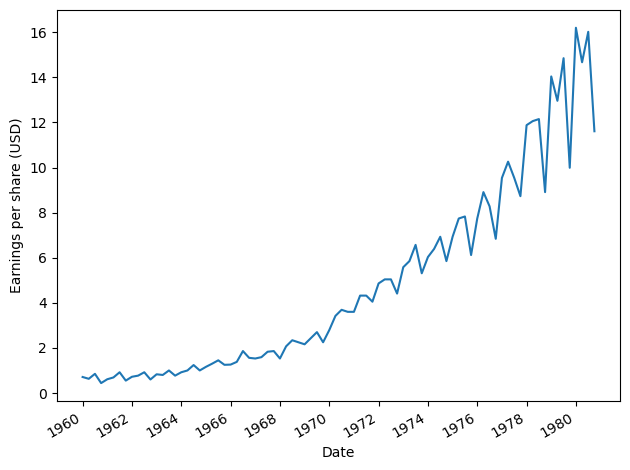

In [4]:
# Plot the dataset using matplotlib.pyplot
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

### LOESS Analysis
In LOESS-based analyses, <b>locally weighted least squares (LOESS)</b> is used to fit a smooth curve to the data. LOESS is similar to a moving average, in that a datum for a year is smoothed by incorporating information from data in adjacent years, and the smoothed value is then used in the analysis.

In [5]:
# Season-Trend decomposition using LOESS.
advanced_decomposition = STL(df.data, period = 4).fit()

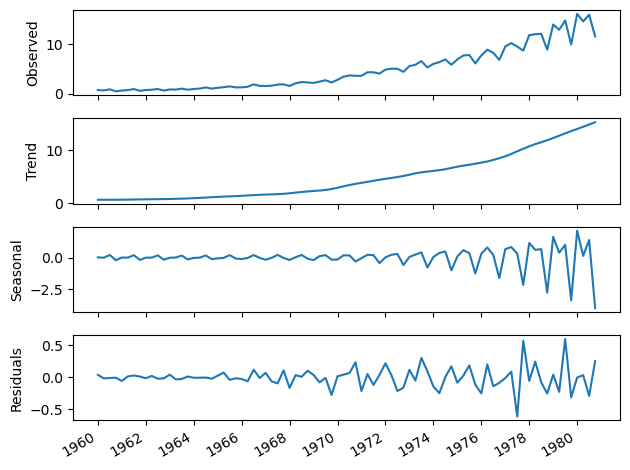

In [6]:
# plot the values returned by STL function
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, sharex = True)

# First, the top graph, labeled as Observed, simply shows the time series as it was recorded 
# The y-axis displays the value of the quarterly earnings per share for Johnson & Johnson in US dollars
# while the x-axis represents time. 

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

# The trend is defined as the slow-moving changes in a time series. We can see that it starts out flat 
# and then steeply goes up, meaning that we have an increasing, or positive, trend in our data. 
# The trend component is referred to as the level. We can think of the trend component as trying to draw a line
# through most of the data points to show the general direction of a time series.

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

# The seasonal component captures the seasonal variation, which is a cycle that occurs over a fixed period of time. 
# We can see that over the course of a year, or four quarters, the earnings per share start low, increase, and 
# decrease again at the end of the year.

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

# Therefore, we can say that the seasonal component shows how we deviate from the trend. 
# Sometimes, we have a positive deviation, and we get a peak in the Observed graph. Other times, 
# we have a negative deviation, and we see a trough in Observed.

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

# Differences between a time series' observed values and those predicted by a statistical model are referred to as 
# "residuals" in time series analysis. 

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

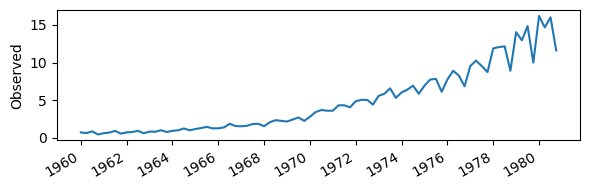

In [7]:
fig, ax = plt.subplots(figsize = (6, 2))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

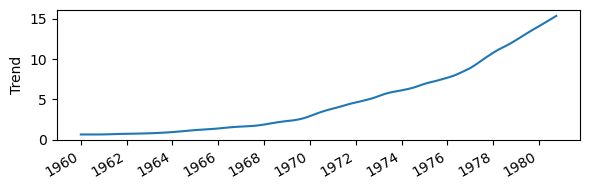

In [8]:
fig, ax = plt.subplots(figsize = (6, 2))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Seasonal
How the y-axis shows negative values? Does this mean that the earnings per share are negative? Clearly, that cannot be, since our dataset strictly has positive values. Therefore, we can say that the seasonal component shows how we deviate from the <b>trend</b>. Sometimes we have a positive deviation, and we get a peak in the Observed graph. Other times, we have a negative deviation, and we see a trough in Observed.

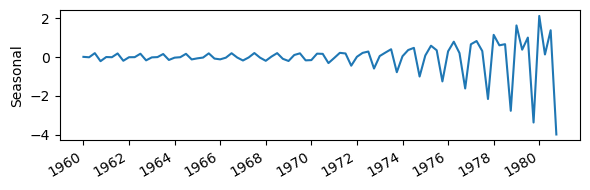

In [9]:
fig, ax = plt.subplots(figsize = (6, 2))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()


## Residuals
We can think of the residuals as adding the Trend and Seasonal graphs together and comparing the value at each point in time to the Observed graph. For certain points, we might get the exact same value as in Observed, in which case the residual will be zero. In other cases, the value is different from the one in Observed, so the Residuals graph shows what value must be added to <b>Trend</b> and <b>Seasonal</b> in order to adjust the result and get the same value as in Observed. Residuals usually correspond to random errors, also termed white noise. They represent information that we cannot model or predict, since it is completely random, as shown in figure.

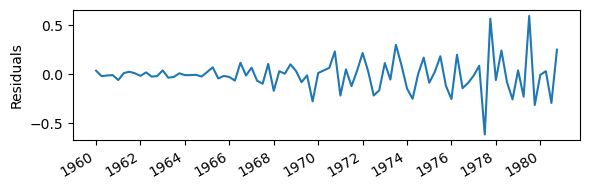

In [10]:
fig, ax = plt.subplots(figsize = (6, 2))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

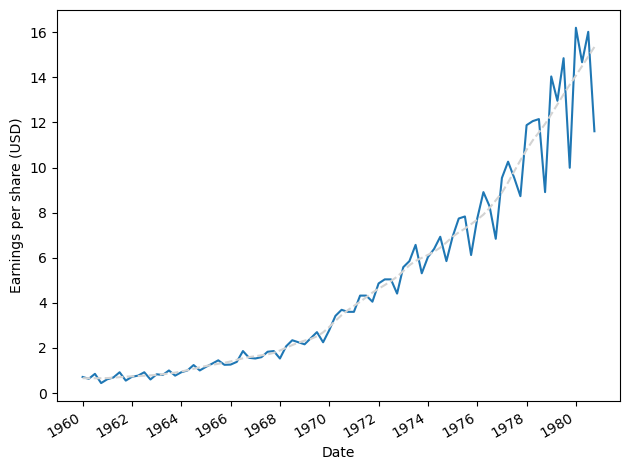

In [11]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [12]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa


# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

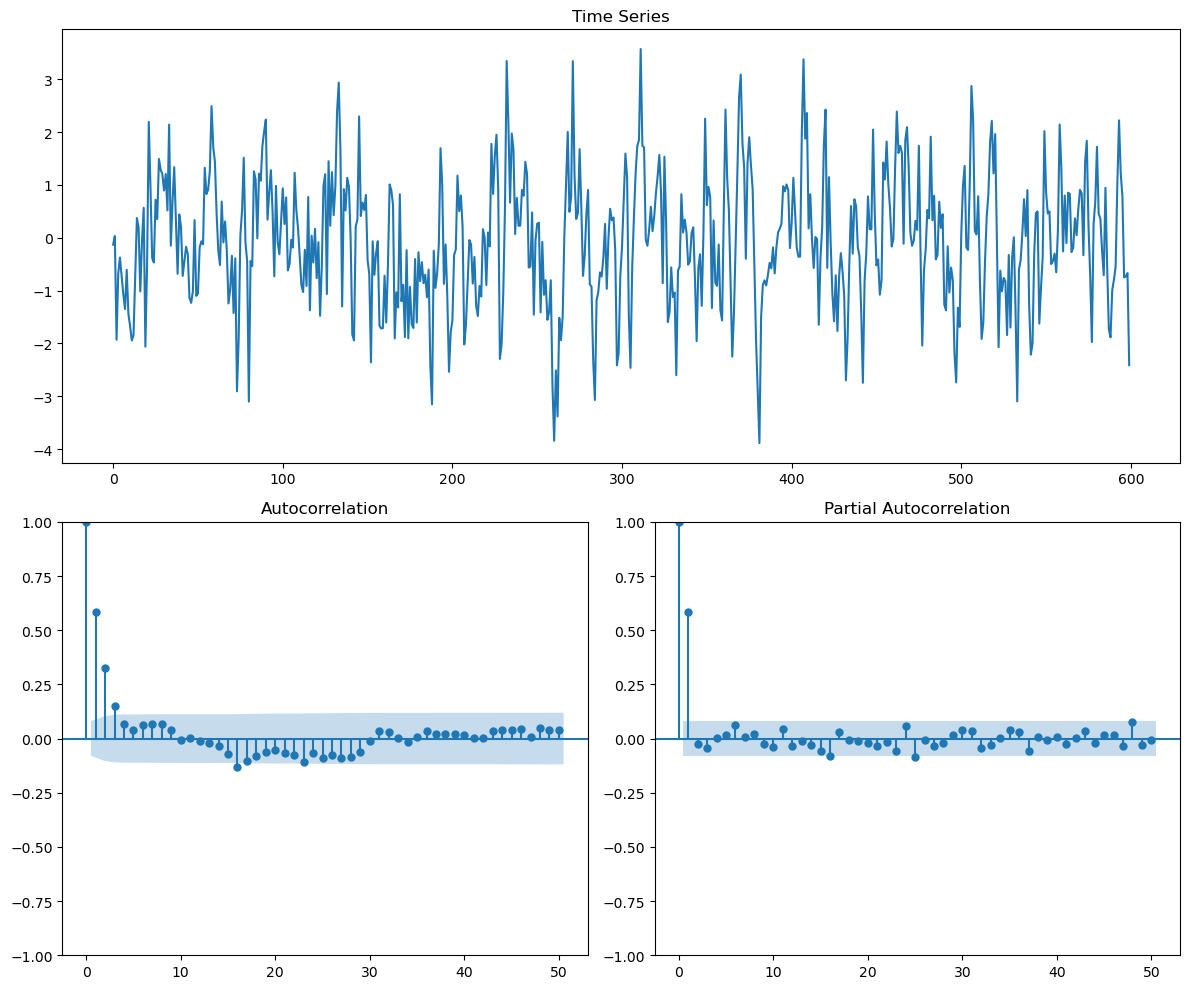

In [13]:
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar = ar, ma = ma, nsample = n) 
plotds(ar1_data)

# The previous script generates a dataset for the AR(1) scenario with serial correlation defined for the previous lag as 0.6.
# The MA component is set to zero to remove any moving average effect from the time series signal.
# The time series signal generated and autocorrelation and partial autocorrelation for the generated signal is shown in Figure below.

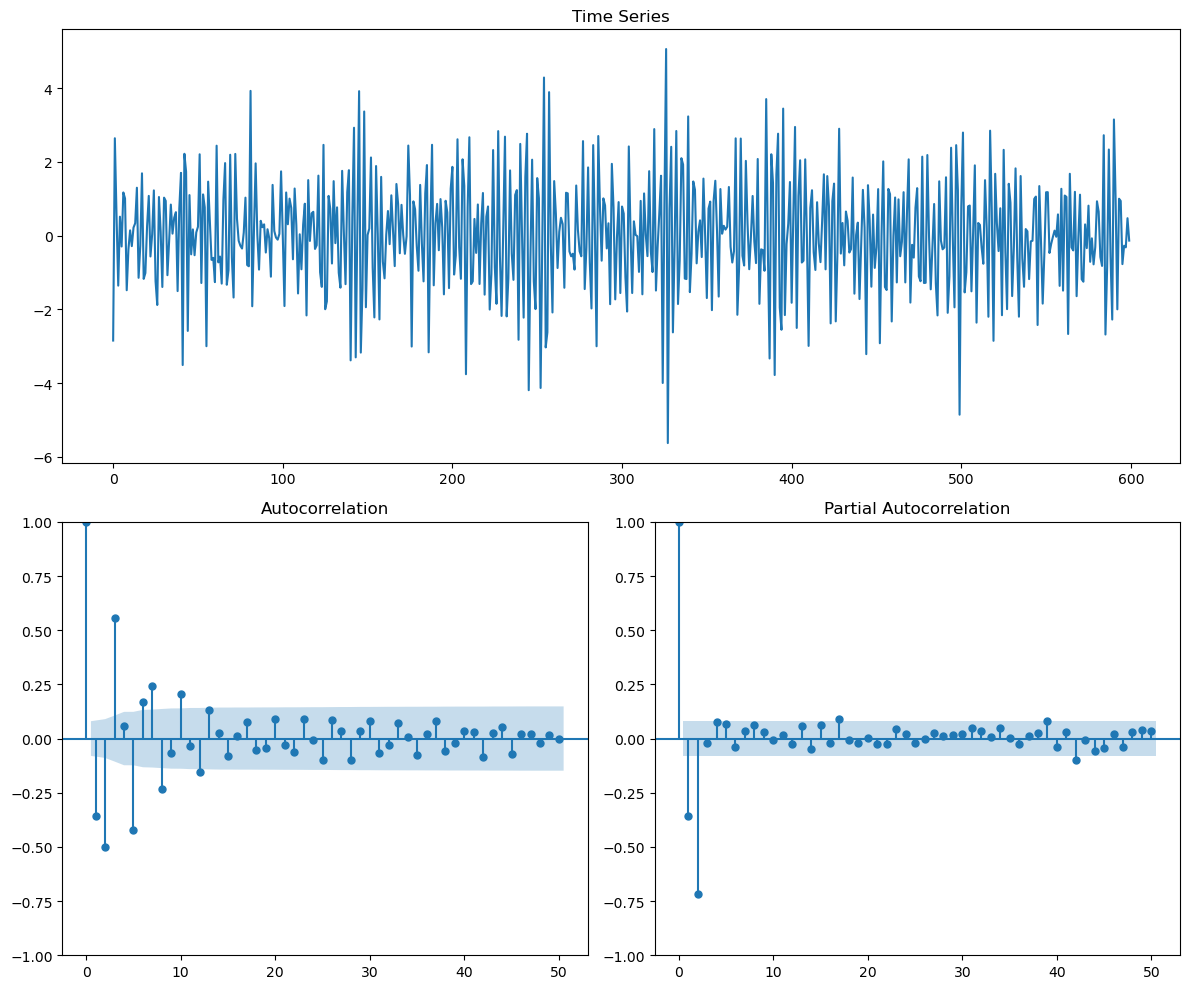

In [14]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

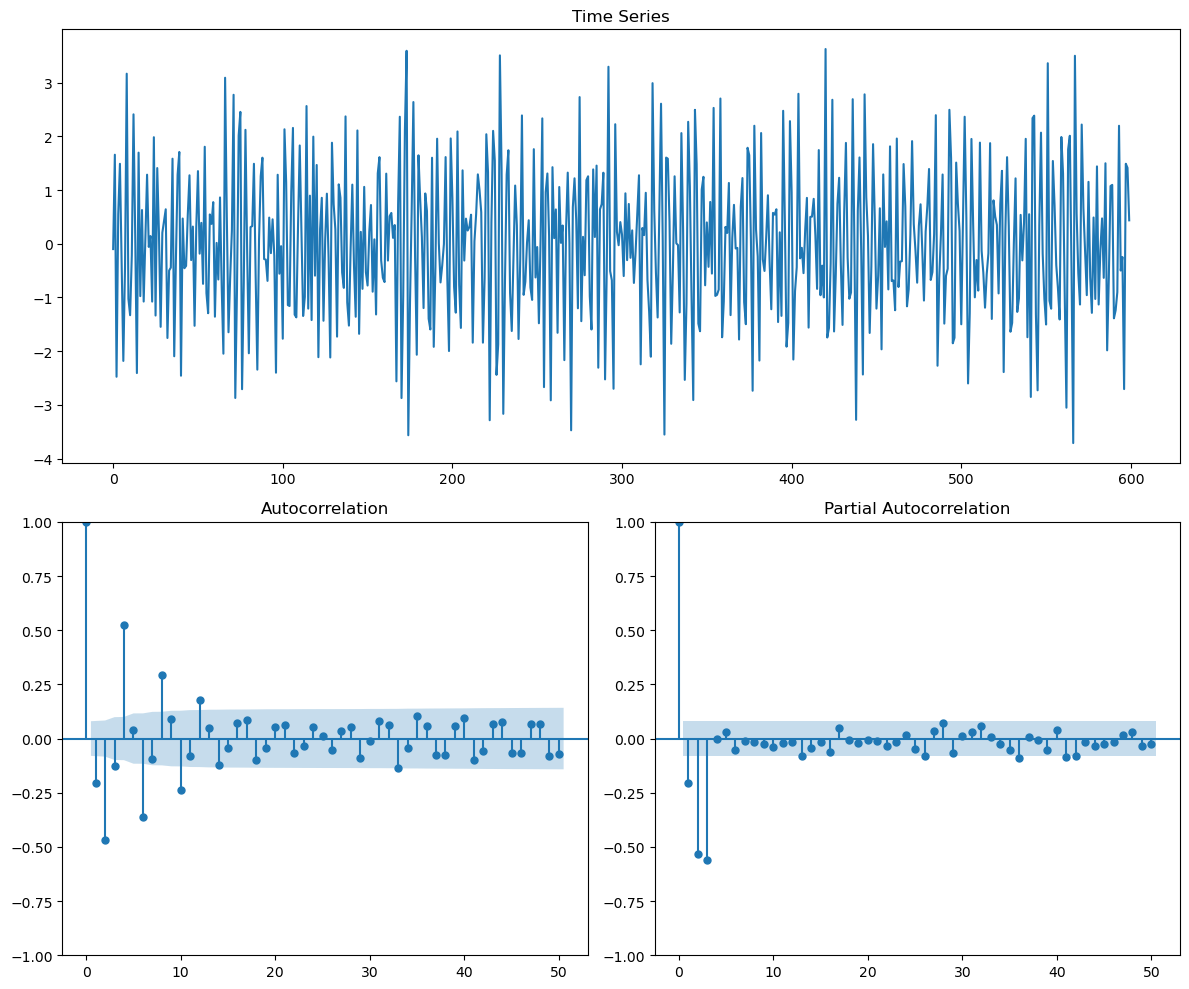

In [15]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

## References
* Time Series Forecasting in Python, Marco Peixeiro, ISBN 9781617299889, Manning Publications, August 2022.